<a href="https://colab.research.google.com/github/niru3691/P1/blob/master/Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [3]:
covid = pd.read_csv("covid_19_data.csv")
covid.head()


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
print("Size/Shape of the dataset",covid.shape)
print("Checking for null values",covid.isnull().sum())
print("Checking datatypes",covid.dtypes)

Size/Shape of the dataset (18327, 8)
Checking for null values SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking datatypes SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [7]:
#Dropping the columns
covid.drop(["SNo"],1,inplace=True)

In [8]:
covid.isnull().sum()

ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [9]:
covid["ObservationDate"] = pd.to_datetime(covid["ObservationDate"])

In [10]:
covid["ObservationDate"]

0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
18322   2020-04-24
18323   2020-04-24
18324   2020-04-24
18325   2020-04-24
18326   2020-04-24
Name: ObservationDate, Length: 18327, dtype: datetime64[ns]

In [12]:
#Grouping different types of cases as per the date
datewise = covid.groupby(["ObservationDate"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})

In [13]:
print("Basic Information")
print("Total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Deaths around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1])
print("Total number of Closed cases around the world",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])

Basic Information
Total number of confirmed cases around the world 2811193.0
Total number of Recovered cases around the world 793601.0
Total number of Deaths around the world 197159.0
Total number of Active cases around the world 1820433.0
Total number of Closed cases around the world 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

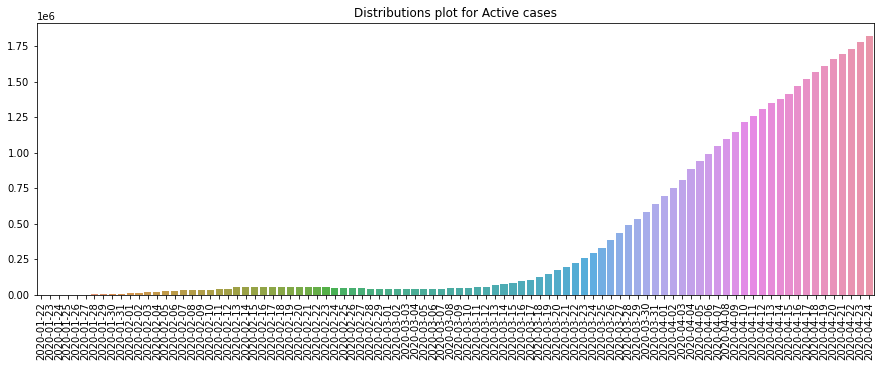

In [14]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

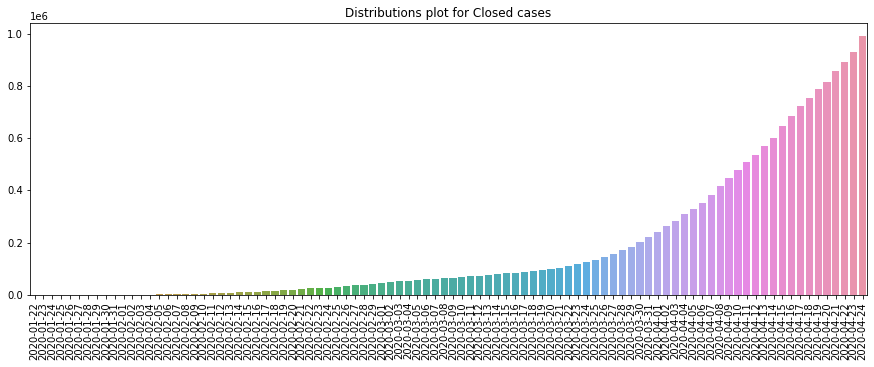

In [15]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distributions plot for Closed cases")
plt.xticks(rotation=90)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


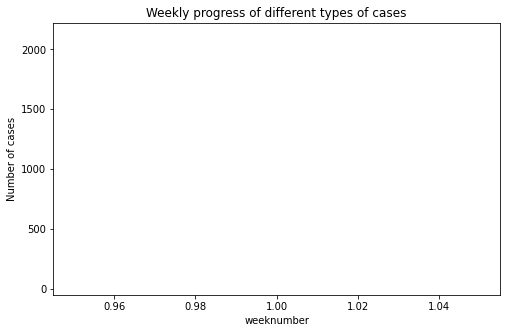

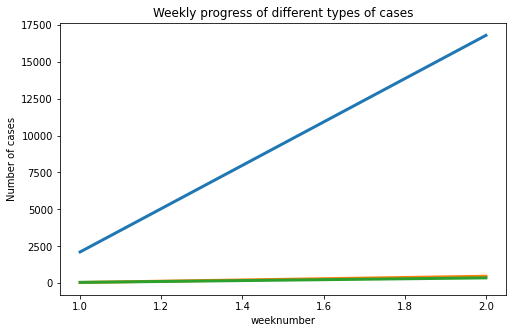

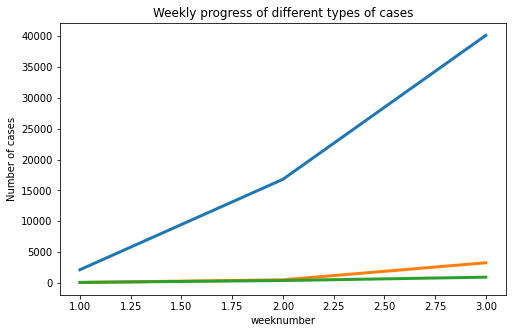

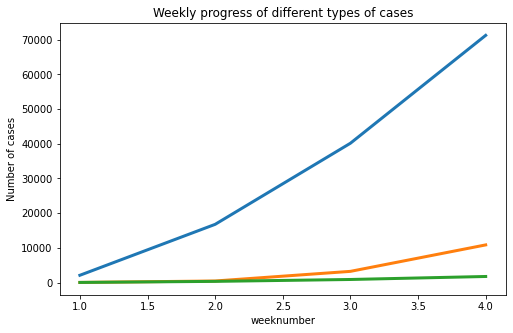

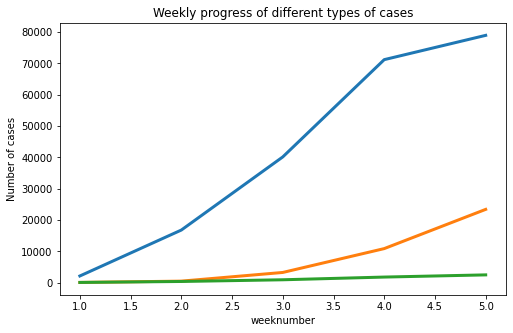

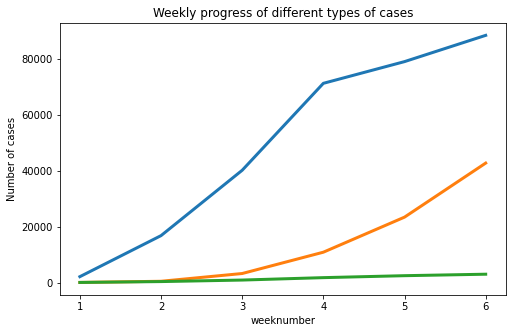

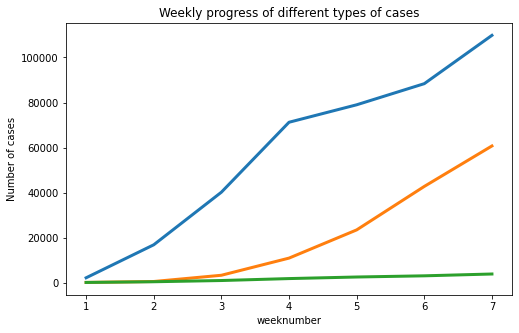

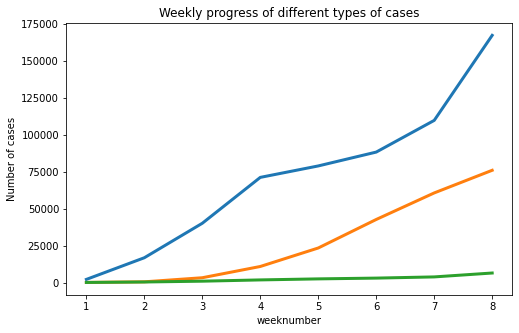

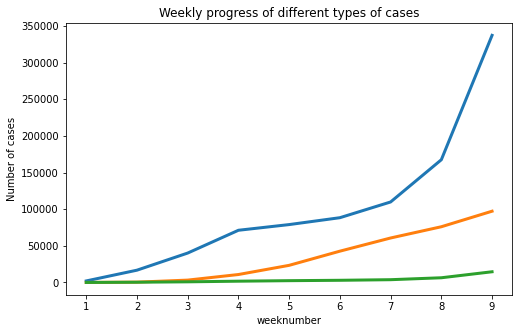

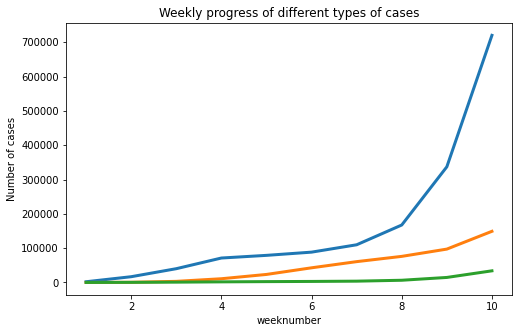

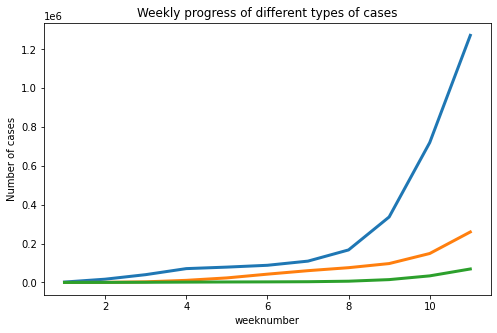

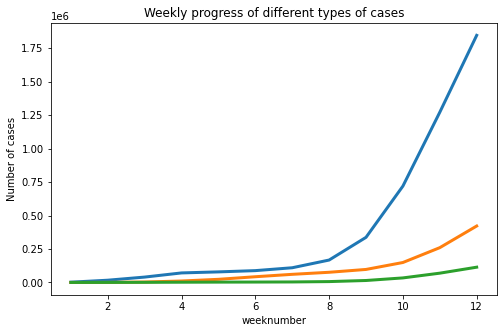

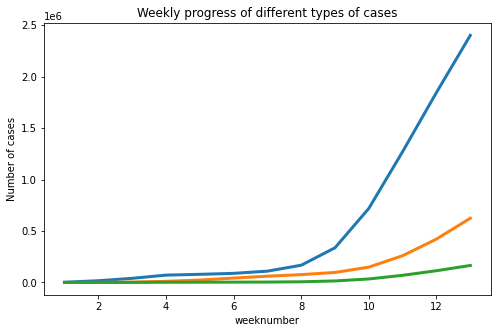

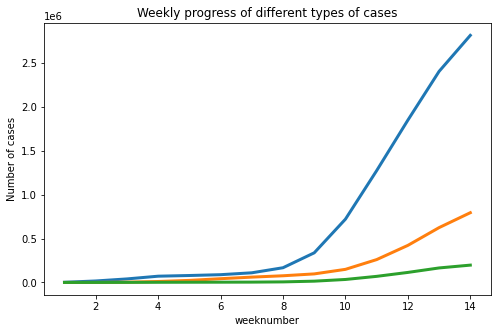

In [18]:
datewise["Weekofyear"] = datewise.index.weekofyear
week_num = []
weekwise_confirmed = []
weekwise_recovered = []
weekwise_Deaths = []
w = 1
for i in list(datewise["Weekofyear"].unique()):
   weekwise_confirmed.append(datewise[datewise["Weekofyear"]==i]["Confirmed"].iloc[-1])
   weekwise_recovered.append(datewise[datewise["Weekofyear"]==i]["Recovered"].iloc[-1])
   weekwise_Deaths.append(datewise[datewise["Weekofyear"]==i]["Deaths"].iloc[-1])
   week_num.append(w)
   w=w+1
   plt.figure(figsize=(8,5))
   plt.plot(week_num,weekwise_confirmed,linewidth=3)
   plt.plot(week_num,weekwise_recovered,linewidth=3)
   plt.plot(week_num,weekwise_Deaths,linewidth=3)
   plt.xlabel("weeknumber")
   plt.ylabel("Number of cases")
   plt.title("Weekly progress of different types of cases")

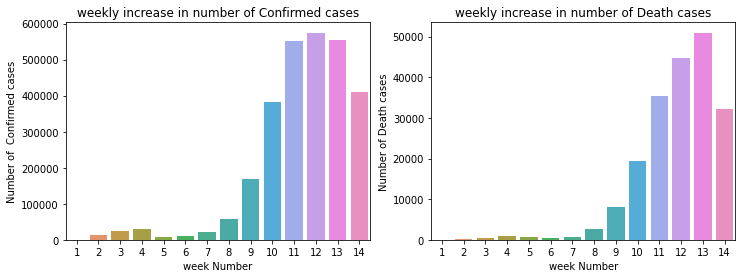

In [20]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_Deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week Number")
ax2.set_xlabel("week Number")
ax1.set_ylabel("Number of  Confirmed cases")
ax2.set_ylabel("Number of Death cases")
ax1.set_title("weekly increase in number of Confirmed cases")
ax2.set_title("weekly increase in number of Death cases")
plt.show()



Average increase in number of confirmed cases everyday : 29900.0
Average increase in number of recovered cases everyday : 8442.0
Average increase in number of Death cases everyday : 2097.0


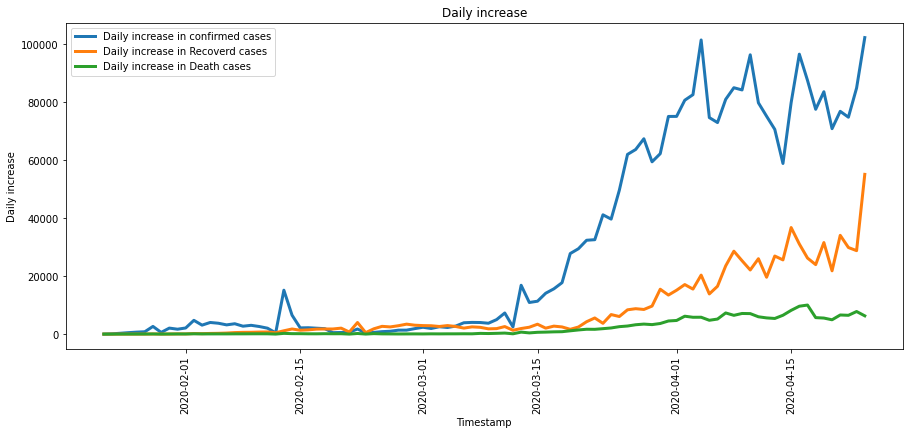

In [22]:
print("Average increase in number of confirmed cases everyday :",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of recovered cases everyday :",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday :",np.round(datewise["Deaths"].diff().fillna(0).mean()))
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recoverd cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [24]:
#country wise analysis
#calculating country wise mortality rate
countrywise = covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Confirmed"],ascending= False)
countrywise["Mortality"]=countrywise["Deaths"]/countrywise["Recovered"]*100
countrywise["Recovered"]=countrywise["Recovered"]/countrywise["Confirmed"]*100

Text(0.5, 1.0, 'Top 15 countries as per number of confirmed cases')

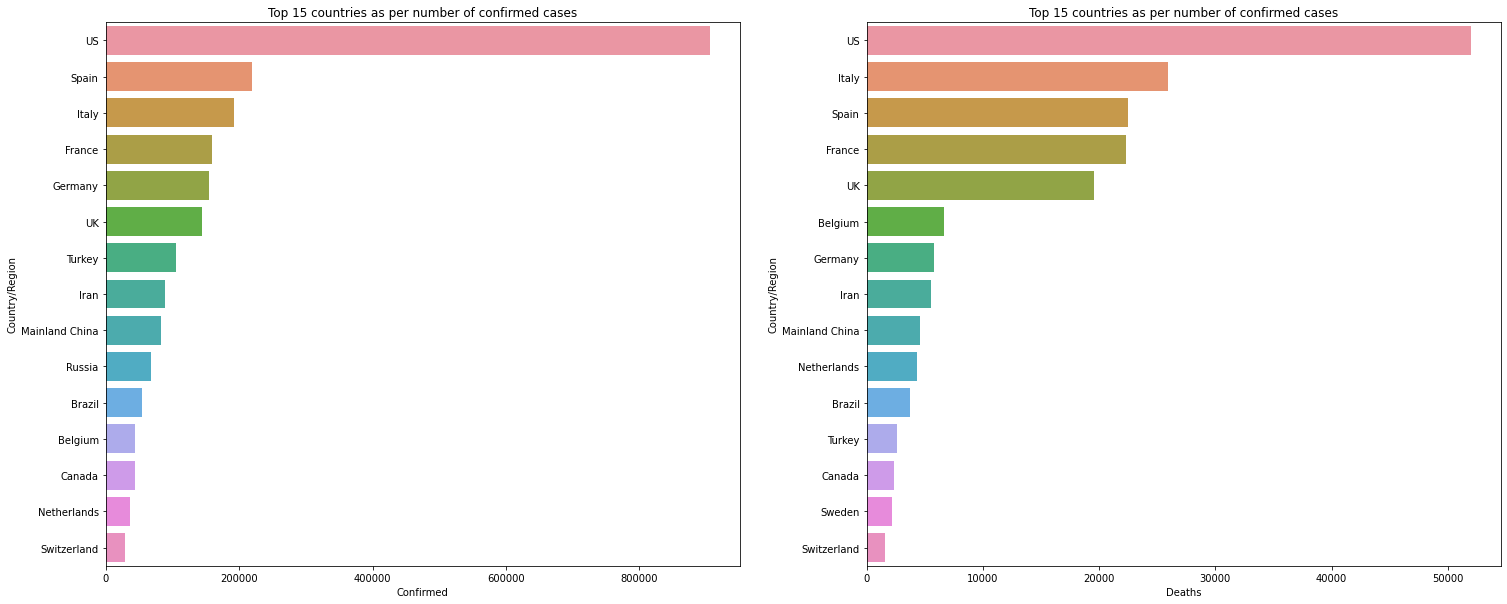

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15confirmed = countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15confirmed["Confirmed"],y=top_15confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of confirmed cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per number of confirmed cases")

In [32]:
#Data analysis for india
india_data = covid[covid["Country/Region"]=="India"]
datewise_india = india_data.groupby(["ObservationDate"].agg({"Confirmed":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active cases",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

SyntaxError: ignored